In [43]:
import torch
import matplotlib.pyplot as plt

In [44]:
N = 10_000 # number of repeats for each value
NUM_POINTS = 1_001 # number of values taken in range

In [201]:
x = torch.linspace(-2, 2, NUM_POINTS)
repeated_x = x.repeat((N, 1))

In [202]:
i = torch.tensor([0, 0.5, 1])
repeated_i = i.repeat((N, 1))

In [203]:
n_vec = torch.arange(1, N + 1).reshape((-1, 1))
n_vec.shape

torch.Size([10000, 1])

In [204]:
def round(repeated_vec):
    return torch.round(repeated_vec)

In [205]:
def randomized_rounding(repeated_vec):
    # encode and decode using randomized rounding
    raise NotImplementedError()

In [206]:
def subtractive_dithering(repeated_vec):
    # encode and decode using subtractive dithering
    raise NotImplementedError()

In [248]:
def shared_random_bit(repeated_vec):
    # encode and decode using a shared random bit
    # here the input is in {0, 0.5, 1}

    raise NotImplementedError()

In [249]:
def cum_rmse(x1, x2):
    return torch.sqrt(torch.cumsum((x1 - x2)**2, dim=0) / n_vec)

In [250]:
def plot_rmse(n):
    plt.title(f'{n=}')
    plt.scatter(x, cum_rmse(randomized_rounding(repeated_x), x)[n - 1, :], s=5, label='randomized rounding')
    plt.scatter(x, cum_rmse(subtractive_dithering(repeated_x), x)[n - 1, :], s=5, label='Subtractive dithering')
    plt.scatter(x, cum_rmse(round(repeated_x), x)[n - 1, :], s=5, label='Round')
    plt.scatter(i, cum_rmse(shared_random_bit(repeated_i), i)[n - 1, :], s=100, marker='X', edgecolor='y', label='Shared random bit')
    plt.ylabel('RMSE')
    plt.xlabel('x')
    plt.legend()

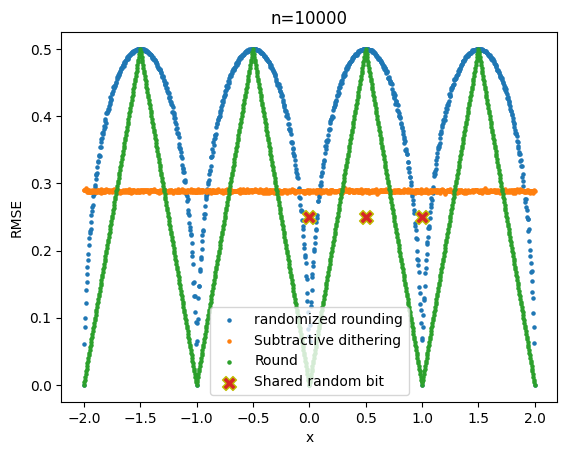

In [251]:
plot_rmse(N)

In [187]:
def cum_bias(x1, x2):
    # aka mean signed deviation
    return torch.cumsum((x1 - x2), axis=0) / n_vec

In [241]:
def plot_bias(n):
    plt.title(f'{n=}')
    plt.scatter(x, cum_bias(randomized_rounding(repeated_x), x)[n - 1, :], s=5, label='randomized rounding')
    plt.scatter(x, cum_bias(subtractive_dithering(repeated_x), x)[n - 1, :], s=5, label='Subtractive dithering')
    plt.scatter(x, cum_bias(round(repeated_x), x)[n - 1, :], s=5, label='Round')
    plt.scatter(i, cum_bias(shared_random_bit(repeated_i), i)[n - 1, :], s=100, marker='X', edgecolor='y', label='Shared random bit')
    plt.ylabel('Bias (mean deviation)')
    plt.xlabel('x')
    plt.legend()

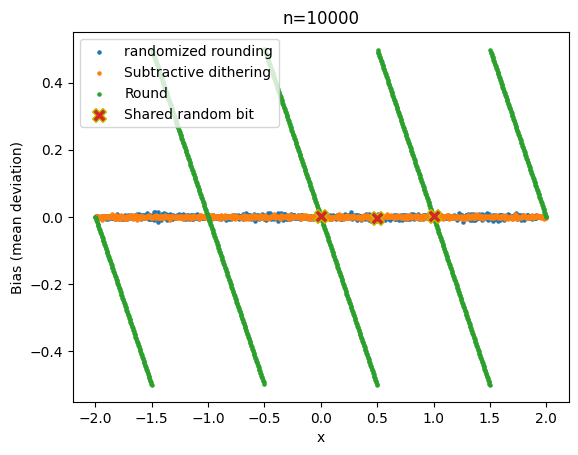

In [242]:
plot_bias(N)